### 2020 Residential Energy Consumption Survey (RECS)

## EDA: EXPLORATORY DATA ANALYSIS

#### Import the libraries

In [1]:
import pandas as pd
import numpy as np
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns

#### Import the data

We are goint to import the cleaned dataset from the Residential Survey

In [2]:
residential_final= pd.read_csv('data/residential.csv', delimiter=',')
residential_final.shape

(51, 24)

In [3]:
residential_final.sample(5)

state_name     region  state_fips state_postal  total_homes  owned  \
41   South Dakota    MIDWEST          46           SD          183    140   
26        Montana       WEST          30           MT          172    125   
0         Alabama      SOUTH           1           AL          242    187   
21  Massachusetts  NORTHEAST          25           MA          552    399   
47     Washington       WEST          53           WA          439    300   

    rented  occupied  type_mobile_home  type_single_family_detached  ...  \
41      41         2                 8                          136  ...   
26      46         1                20                          122  ...   
0       51         4                33                          167  ...   
21     148         5                 4                          327  ...   
47     138         1                28                          296  ...   

    year_made_1950_1959  year_made_1960_1969  year_made_1970_1979  \
41                   15                   14                   34   
26                   10                   15                   31   
0                    17                   26                   32   
21                   58                   57                   65   
47                   30                   38                   69   

    year_made_1980_1989  year_made_1990_1999  year_made_2000_2009  \
41                   17                   18                   28   
26                   20                   26                   20   
0                    34                   34                   47   
21                   71                   50                   41   
47                   36                   72                   67   

    year_made_2010_2015  year_made_2016_2020  use_solar_heating  \
41                   13                   20                  0   
26                   14                   11                  2   
0                    19                    6                  0   
21                   19                   20                  2   
47                   29                   33                  1   

    energy_assistance  
41                  4  
26                  4  
0                   1  
21                 11  
47                  4  

[5 rows x 24 columns]

In [4]:
residential_final.columns

Index(['state_name', 'region', 'state_fips', 'state_postal', 'total_homes',
       'owned', 'rented', 'occupied', 'type_mobile_home',
       'type_single_family_detached', 'type_single_family_attached',
       'type_apartment_building_2_to_4_units ',
       'type_apartment_building_more_5_units', 'year_made_before_1950',
       'year_made_1950_1959', 'year_made_1960_1969', 'year_made_1970_1979',
       'year_made_1980_1989', 'year_made_1990_1999', 'year_made_2000_2009',
       'year_made_2010_2015', 'year_made_2016_2020', 'use_solar_heating',
       'energy_assistance'],
      dtype='object')

#### Questions for EDA:

We want to expore:

1. What are the distribution of the features:home ownership, age of buildings ,type of homes

2. What are the differences by state in residential features:home ownership, age of buildings ,type or home

3. Is there  an actual difference in the state adoption of solar energy and  residential features:home ownership, age of buildings ,type or home?

### 1- Distriution of residential features

#### Distribution of home ownership

In [5]:
total_homes=residential_final['total_homes'].sum()
home_owned_rate=residential_final['owned'].sum()/total_homes
home_rented_rate=residential_final['rented'].sum()/total_homes
home_occupied_rate=residential_final['occupied'].sum()/total_homes
home_ownership_rates_data = [['owned', home_owned_rate], ['rented', home_rented_rate], ['occupied', home_occupied_rate]]
home_ownership_rates= pd.DataFrame(home_ownership_rates_data, columns=['home_ownership', 'percentaje_homes'])
home_ownership_rates

home_ownership  percentaje_homes
0          owned          0.727184
1         rented          0.262976
2       occupied          0.009840

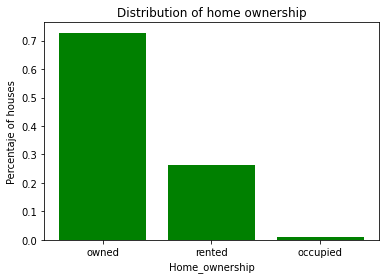

In [6]:
plt.bar(home_ownership_rates['home_ownership'], home_ownership_rates['percentaje_homes'], color='green')
plt.xlabel("Home_ownership")
plt.ylabel('Percentaje of houses')
plt.title("Distribution of home ownership")
plt.show()

#### Distribution of year made

In [7]:
year_home_rate_before_1950=residential_final['year_made_before_1950'].sum()/total_homes
year_home_rate_1950_1959=residential_final['year_made_1950_1959'].sum()/total_homes
year_home_rate_1960_1969=residential_final['year_made_1960_1969'].sum()/total_homes
year_home_rate_1970_1979=residential_final['year_made_1970_1979'].sum()/total_homes
year_home_rate_1980_1989=residential_final['year_made_1980_1989'].sum()/total_homes
year_home_rate_1990_1999=residential_final['year_made_1990_1999'].sum()/total_homes
year_home_rate_2000_2009=residential_final['year_made_2000_2009'].sum()/total_homes
year_home_rate_2010_2015=residential_final['year_made_2010_2015'].sum()/total_homes
year_home_rate_2016_2020=residential_final['year_made_2016_2020'].sum()/total_homes

  
year_home_rates_data = [['Before 1950',year_home_rate_before_1950],['1950-1959',year_home_rate_1950_1959],['1960-1969',year_home_rate_1960_1969],['1970-1979',year_home_rate_1970_1979],['1980-1989',year_home_rate_1980_1989],['1990-1999',year_home_rate_1990_1999],['2000-2009',year_home_rate_2000_2009],['2010-2015',year_home_rate_2010_2015],['2016-2020',year_home_rate_2016_2020]]

year_home_rates= pd.DataFrame(year_home_rates_data, columns=['year_built_homes', 'percentaje_homes'])
year_home_rates

year_built_homes  percentaje_homes
0      Before 1950          0.147113
1        1950-1959          0.091101
2        1960-1969          0.100941
3        1970-1979          0.152303
4        1980-1989          0.131650
5        1990-1999          0.132515
6        2000-2009          0.148573
7        2010-2015          0.053471
8        2016-2020          0.042333

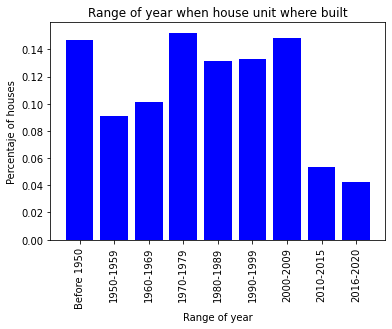

In [8]:
plt.bar(year_home_rates['year_built_homes'], year_home_rates['percentaje_homes'], color='blue')
plt.xlabel("Range of year")
plt.ylabel('Percentaje of houses')
plt.title("Range of year when house unit where built")
plt.xticks(rotation=90)
plt.show()

#### Distribution of type of home

Distribution of types of homes between: Mobile home, Single-family house detached from any other house,  Single-family house attached to one or more other houses (for example: duplex, row house, or townhome), Apartment in a building with 2 to 4 units and Apartment in a building with 5 or more units

In [9]:
type_mobile_home=residential_final['type_mobile_home'].sum()/total_homes
type_single_family_detached=residential_final['type_single_family_detached'].sum()/total_homes
type_single_family_attached=residential_final['type_single_family_attached'].sum()/total_homes
type_apartment_building_2_to_4_units=residential_final['type_apartment_building_2_to_4_units '].sum()/total_homes
type_apartment_building_more_5_units=residential_final['type_apartment_building_more_5_units'].sum()/total_homes
  
type_home_rates_data = [['Mobile home',type_mobile_home], ['Single family detached',type_single_family_detached], ['Single family attached',type_single_family_attached], ['Apartment in building with 2 to 4 units',type_apartment_building_2_to_4_units], ['Apartment in building with more than 5 units', type_apartment_building_more_5_units]]
type_home_rates= pd.DataFrame(type_home_rates_data, columns=['type_homes', 'percentaje_homes'])
type_home_rates

type_homes  percentaje_homes
0                                   Mobile home          0.052660
1                        Single family detached          0.666036
2                        Single family attached          0.094669
3       Apartment in building with 2 to 4 units          0.054769
4  Apartment in building with more than 5 units          0.131866

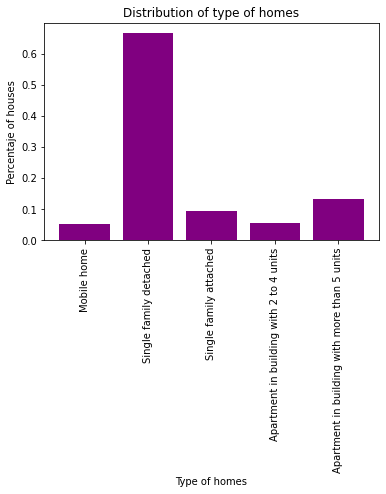

In [10]:
plt.bar(type_home_rates['type_homes'], type_home_rates['percentaje_homes'], color='purple')
plt.xlabel("Type of homes")
plt.ylabel('Percentaje of houses')
plt.title("Distribution of type of homes")
plt.xticks(rotation=90)
plt.show()

#### Percentaje of Energy Asistance

In [11]:
energy_assistance_rate=(residential_final['energy_assistance'].sum()/total_homes)*100
energy_assistance_rate

1.157006920415225

#### Percentaje of Solar Energy for heating

In [12]:
use_solar_heating_rate=(residential_final['use_solar_heating'].sum()/total_homes)*100
use_solar_heating_rate

0.4757785467128028

### 2-Residential features across the states

To analize the diferences across the states, we convert the data in percentajes of the total of houses

In [13]:
residential_final_rates=residential_final.set_index('state_name')
columns = ['total_homes',
       'owned', 'rented', 'occupied', 'type_mobile_home',
       'type_single_family_detached', 'type_single_family_attached',
       'type_apartment_building_2_to_4_units ',
       'type_apartment_building_more_5_units', 'year_made_before_1950',
       'year_made_1950_1959', 'year_made_1960_1969', 'year_made_1970_1979',
       'year_made_1980_1989', 'year_made_1990_1999', 'year_made_2000_2009',
       'year_made_2010_2015', 'year_made_2016_2020', 'use_solar_heating',
       'energy_assistance']
residential_final_rates[columns] = residential_final_rates[columns].div(residential_final_rates['total_homes'], axis=0)
residential_final_rates.head(5)

region  state_fips state_postal  total_homes     owned    rented  \
state_name                                                                    
Alabama     SOUTH           1           AL          1.0  0.772727  0.210744   
Alaska       WEST           2           AK          1.0  0.678457  0.299035   
Arizona      WEST           4           AZ          1.0  0.751515  0.238384   
Arkansas    SOUTH           5           AR          1.0  0.727612  0.250000   
California   WEST           6           CA          1.0  0.632812  0.360243   

            occupied  type_mobile_home  type_single_family_detached  \
state_name                                                            
Alabama     0.016529          0.136364                     0.690083   
Alaska      0.022508          0.038585                     0.627010   
Arizona     0.010101          0.076768                     0.711111   
Arkansas    0.022388          0.089552                     0.772388   
California  0.006944          0.032986                     0.608507   

            type_single_family_attached  ...  year_made_1950_1959  \
state_name                               ...                        
Alabama                        0.045455  ...             0.070248   
Alaska                         0.163987  ...             0.048232   
Arizona                        0.086869  ...             0.040404   
Arkansas                       0.055970  ...             0.055970   
California                     0.118056  ...             0.132812   

            year_made_1960_1969  year_made_1970_1979  year_made_1980_1989  \
state_name                                                                  
Alabama                0.107438             0.132231             0.140496   
Alaska                 0.057878             0.228296             0.250804   
Arizona                0.080808             0.155556             0.161616   
Arkansas               0.126866             0.179104             0.167910   
California             0.122396             0.184028             0.154514   

            year_made_1990_1999  year_made_2000_2009  year_made_2010_2015  \
state_name                                                                  
Alabama                0.140496             0.194215             0.078512   
Alaska                 0.102894             0.183280             0.073955   
Arizona                0.181818             0.242424             0.052525   
Arkansas               0.119403             0.164179             0.052239   
California             0.106771             0.124132             0.031250   

            year_made_2016_2020  use_solar_heating  energy_assistance  
state_name                                                             
Alabama                0.024793           0.000000           0.004132  
Alaska                 0.025723           0.003215           0.028939  
Arizona                0.056566           0.008081           0.012121  
Arkansas               0.044776           0.000000           0.014925  
California             0.023438           0.002604           0.021701  

[5 rows x 23 columns]

#### Home ownership by state

Text(0.5, 1.0, 'Home ownership per state')

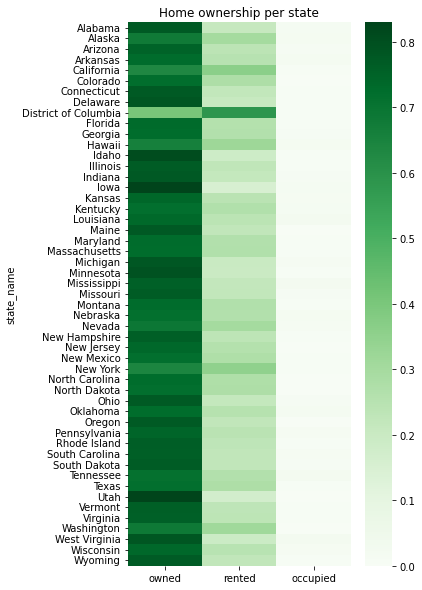

In [14]:
fig, ax = plt.subplots(figsize=(5, 10))
ax = sns.heatmap(residential_final_rates[['owned', 'rented', 'occupied']], cmap="Greens")
ax.set_title("Home ownership per state")

#### Type of house by state

Text(0.5, 1.0, 'Type of homes per state')

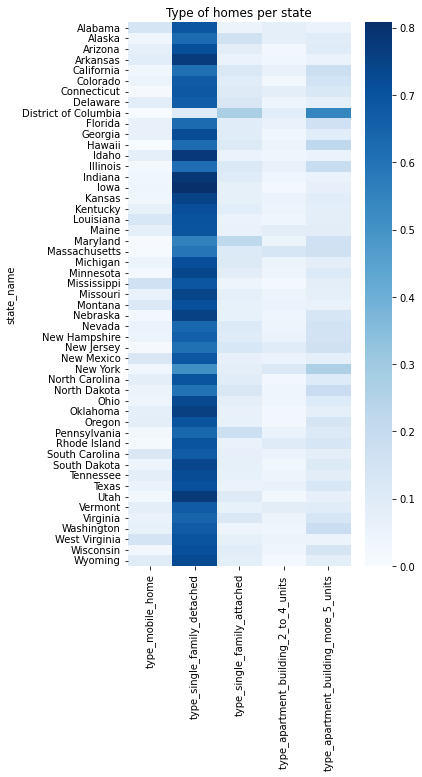

In [15]:
fig, ax = plt.subplots(figsize=(5, 10))
ax= sns.heatmap(residential_final_rates[['type_mobile_home',
       'type_single_family_detached', 'type_single_family_attached',
       'type_apartment_building_2_to_4_units ',
       'type_apartment_building_more_5_units']], cmap="Blues")
ax.set_title("Type of homes per state")

#### Year where the hpuse were built by state

Text(0.5, 1.0, 'Year of houses built per state')

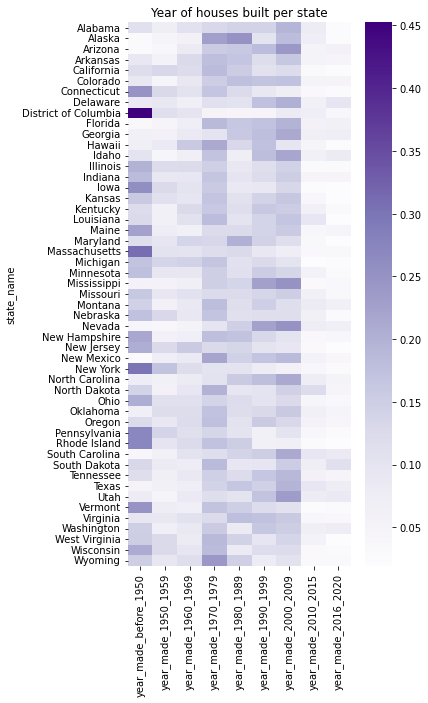

In [16]:
fig, ax = plt.subplots(figsize=(5, 10))
ax= sns.heatmap(residential_final_rates[[ 'year_made_before_1950',
       'year_made_1950_1959', 'year_made_1960_1969', 'year_made_1970_1979',
       'year_made_1980_1989', 'year_made_1990_1999', 'year_made_2000_2009',
       'year_made_2010_2015', 'year_made_2016_2020']], cmap="Purples")
ax.set_title("Year of houses built per state")

Text(0.5, 1.0, 'Use of solar energy for heating and energy assistance per state')

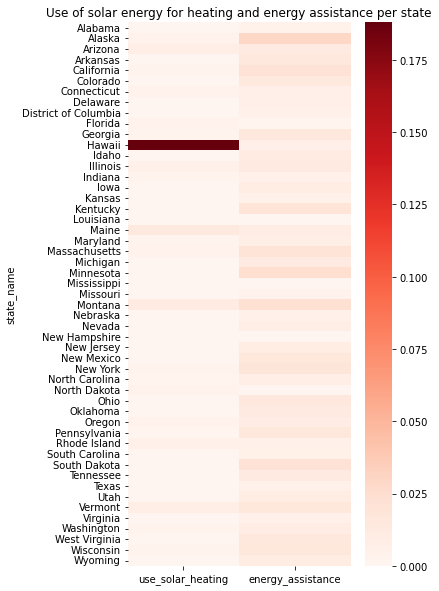

In [17]:
fig, ax = plt.subplots(figsize=(5, 10))
ax= sns.heatmap(residential_final_rates[[ 'use_solar_heating',
       'energy_assistance']], cmap="Reds")
ax.set_title("Use of solar energy for heating and energy assistance per state")

### Relationship with Solar adoption 

#### Import the data about solar adoption

We are going to import the dataset related ith solar adoption across the Satates in the US from the Solar Demographics tool by Berkeley lab

In [18]:
solar_adoption= pd.read_csv('data/all_states.csv', delimiter=',')
solar_adoption.head(5)

Unnamed: 0  Year    state          bin_description   pct     N
0           1  2010  Arizona        Income bin: <$50k  13.5   476
1           2  2010  Arizona     Income bin: $50-100k  34.6  1219
2           3  2010  Arizona    Income bin: $100-150k  25.3   890
3           4  2010  Arizona  Income bin: $150k-$200k  10.9   383
4           5  2010  Arizona    Income bin: $200-250k   5.6   199

In [19]:
solar_adoption = solar_adoption.drop(columns = 'Unnamed: 0')

we pivot the table using as index the year and state and the values de N number of houses

In [20]:
solar_adoption_count= solar_adoption.pivot(index = ['Year', 'state'], columns = 'bin_description',  values='N')

We calculate the tolat number of solar adopters per year and state

In [21]:
solar_adoption_count['total_count']= solar_adoption_count['% of Poverty Level: 150-200%']+solar_adoption_count['% of Poverty Level: 200-250%']+solar_adoption_count['% of Poverty Level: 250-300%']+solar_adoption_count['% of Poverty Level: <150%']+solar_adoption_count['% of Poverty Level: >300%']+solar_adoption_count['% of Poverty Level: NA']
solar_adoption_count.head(5)

bin_description   % of Poverty Level: 150-200%  % of Poverty Level: 200-250%  \
Year state                                                                     
2010 Arizona                               176                           236   
     Arkansas                                6                             3   
     California                            892                           793   
     Colorado                               39                            47   
     Connecticut                            18                            21   

bin_description   % of Poverty Level: 250-300%  % of Poverty Level: <150%  \
Year state                                                                  
2010 Arizona                               281                        176   
     Arkansas                                5                          5   
     California                            963                        842   
     Colorado                               76                         74   
     Connecticut                            29                         18   

bin_description   % of Poverty Level: >300%  % of Poverty Level: NA  \
Year state                                                            
2010 Arizona                           2654                       0   
     Arkansas                            30                       0   
     California                       17078                       0   
     Colorado                          1340                       0   
     Connecticut                        372                       0   

bin_description   AMI Bin: 100-120%  AMI Bin: 60-80%  AMI Bin: 80-100%  \
Year state                                                               
2010 Arizona                    302              256               343   
     Arkansas                     5                4                 5   
     California                2215             1500              1891   
     Colorado                   183              120               143   
     Connecticut                 69               56                54   

bin_description   AMI Bin: <60%  ...  Income bin: $50-100k  Income bin: <$50k  \
Year state                       ...                                            
2010 Arizona                251  ...                  1219                476   
     Arkansas                 6  ...                    17                 15   
     California            2392  ...                  4960               1813   
     Colorado               130  ...                   404                128   
     Connecticut             45  ...                   137                 30   

bin_description   Income bin: >$250k  State Percentile: 0-20%  \
Year state                                                      
2010 Arizona                     356                       80   
     Arkansas                      1                        4   
     California                 4029                      381   
     Colorado                    252                       51   
     Connecticut                  58                       11   

bin_description   State Percentile: 20-40%  State Percentile: 40-60%  \
Year state                                                             
2010 Arizona                           225                       496   
     Arkansas                            3                         8   
     California                       1515                      2789   
     Colorado                           78                       182   
     Connecticut                        26                       105   

bin_description   State Percentile: 60-80%  State Percentile: 80-100%  \
Year state                                                              
2010 Arizona                           913                       1809   
     Arkansas                           14                         20   
     California                       4556                   

In [22]:
solar_adoption_final=solar_adoption_count.reset_index()
solar_adoption_final=solar_adoption_final[['Year','state','total_count']]
solar_adoption_final

bin_description  Year        state  total_count
0                2010      Arizona         3523
1                2010     Arkansas           49
2                2010   California        20568
3                2010     Colorado         1576
4                2010  Connecticut          458
..                ...          ...          ...
479              2021         Utah         6162
480              2021      Vermont         1020
481              2021     Virginia         7419
482              2021   Washington         5734
483              2021    Wisconsin         2123

[484 rows x 3 columns]

We are going to filter the data for year 2020 to compare with the residential dataset

In [23]:
solar_adoption_2020=solar_adoption_final[solar_adoption_final['Year']< 2021]
solar_adoption_2020=solar_adoption_2020.groupby(['state'])['total_count'].sum().to_frame()
solar_adoption_2020=solar_adoption_2020.reset_index()
solar_adoption_2020=solar_adoption_2020.set_index('state')
solar_adoption_2020.head(5)

total_count
state                   
Arizona           129879
Arkansas             543
California       1132648
Colorado           61758
Connecticut        42028

#### Import the data about housing unit

Impor the data of housing unis per state por Census

In [24]:
housing_units= pd.read_csv('data/housing_units.csv', delimiter=';')
housing_units=housing_units.set_index('State')
housing_units['Housing unit']=housing_units['Housing unit'].astype(float)
housing_units.head(5)

Housing unit
State                   
Alabama        2288330.0
Alaska          326200.0
Arizona        3082000.0
Arkansas       1365265.0
California    14392140.0

#### Join the data wih the residetial dataset solar adopters and housing units per state

In [25]:
result = pd.concat([residential_final_rates, solar_adoption_2020, housing_units], axis=1).reindex(residential_final_rates.index)
result.head(5)

region  state_fips state_postal  total_homes     owned    rented  \
state_name                                                                    
Alabama     SOUTH         1.0           AL          1.0  0.772727  0.210744   
Alaska       WEST         2.0           AK          1.0  0.678457  0.299035   
Arizona      WEST         4.0           AZ          1.0  0.751515  0.238384   
Arkansas    SOUTH         5.0           AR          1.0  0.727612  0.250000   
California   WEST         6.0           CA          1.0  0.632812  0.360243   

            occupied  type_mobile_home  type_single_family_detached  \
state_name                                                            
Alabama     0.016529          0.136364                     0.690083   
Alaska      0.022508          0.038585                     0.627010   
Arizona     0.010101          0.076768                     0.711111   
Arkansas    0.022388          0.089552                     0.772388   
California  0.006944          0.032986                     0.608507   

            type_single_family_attached  ...  year_made_1970_1979  \
state_name                               ...                        
Alabama                        0.045455  ...             0.132231   
Alaska                         0.163987  ...             0.228296   
Arizona                        0.086869  ...             0.155556   
Arkansas                       0.055970  ...             0.179104   
California                     0.118056  ...             0.184028   

            year_made_1980_1989  year_made_1990_1999  year_made_2000_2009  \
state_name                                                                  
Alabama                0.140496             0.140496             0.194215   
Alaska                 0.250804             0.102894             0.183280   
Arizona                0.161616             0.181818             0.242424   
Arkansas               0.167910             0.119403             0.164179   
California             0.154514             0.106771             0.124132   

            year_made_2010_2015  year_made_2016_2020  use_solar_heating  \
state_name                                                                
Alabama                0.078512             0.024793           0.000000   
Alaska                 0.073955             0.025723           0.003215   
Arizona                0.052525             0.056566           0.008081   
Arkansas               0.052239             0.044776           0.000000   
California             0.031250             0.023438           0.002604   

            energy_assistance  total_count  Housing unit  
state_name                                                
Alabama              0.004132          NaN     2288330.0  
Alaska               0.028939          NaN      326200.0  
Arizona              0.012121     129879.0     3082000.0  
Arkansas             0.014925        543.0     1365265.0  
California           0.021701    1132648.0    14392140.0  

[5 rows x 25 columns]

In [26]:
result_new= result.dropna().copy()
result_new.head(5)

region  state_fips state_postal  total_homes     owned  \
state_name                                                               
Arizona           WEST         4.0           AZ          1.0  0.751515   
Arkansas         SOUTH         5.0           AR          1.0  0.727612   
California        WEST         6.0           CA          1.0  0.632812   
Colorado          WEST         8.0           CO          1.0  0.722222   
Connecticut  NORTHEAST         9.0           CT          1.0  0.772109   

               rented  occupied  type_mobile_home  \
state_name                                          
Arizona      0.238384  0.010101          0.076768   
Arkansas     0.250000  0.022388          0.089552   
California   0.360243  0.006944          0.032986   
Colorado     0.277778  0.000000          0.050000   
Connecticut  0.221088  0.006803          0.010204   

             type_single_family_detached  type_single_family_attached  ...  \
state_name                                                             ...   
Arizona                         0.711111                     0.086869  ...   
Arkansas                        0.772388                     0.055970  ...   
California                      0.608507                     0.118056  ...   
Colorado                        0.675000                     0.094444  ...   
Connecticut                     0.683673                     0.102041  ...   

             year_made_1970_1979  year_made_1980_1989  year_made_1990_1999  \
state_name                                                                   
Arizona                 0.155556             0.161616             0.181818   
Arkansas                0.179104             0.167910             0.119403   
California              0.184028             0.154514             0.106771   
Colorado                0.152778             0.175000             0.169444   
Connecticut             0.166667             0.125850             0.091837   

             year_made_2000_2009  year_made_2010_2015  year_made_2016_2020  \
state_name                                                                   
Arizona                 0.242424             0.052525             0.056566   
Arkansas                0.164179             0.052239             0.044776   
California              0.124132             0.031250             0.023438   
Colorado                0.172222             0.052778             0.050000   
Connecticut             0.071429             0.034014             0.027211   

             use_solar_heating  energy_assistance  total_count  Housing unit  
state_name                                                                    
Arizona               0.008081           0.012121     129879.0     3082000.0  
Arkansas              0.000000           0.014925        543.0     1365265.0  
California            0.002604           0.021701    1132648.0    14392140.0  
Colorado              0.000000           0.013889      61758.0     2491404.0  
Connecticut           0.003401           0.006803      42028.0     1530197.0  

[5 rows x 25 columns]

Calculate solar adoption rate per state

In [27]:
result_new['solar_adoption_rate']=result_new['total_count']/result_new['Housing unit']
result_new.head(5)

region  state_fips state_postal  total_homes     owned  \
state_name                                                               
Arizona           WEST         4.0           AZ          1.0  0.751515   
Arkansas         SOUTH         5.0           AR          1.0  0.727612   
California        WEST         6.0           CA          1.0  0.632812   
Colorado          WEST         8.0           CO          1.0  0.722222   
Connecticut  NORTHEAST         9.0           CT          1.0  0.772109   

               rented  occupied  type_mobile_home  \
state_name                                          
Arizona      0.238384  0.010101          0.076768   
Arkansas     0.250000  0.022388          0.089552   
California   0.360243  0.006944          0.032986   
Colorado     0.277778  0.000000          0.050000   
Connecticut  0.221088  0.006803          0.010204   

             type_single_family_detached  type_single_family_attached  ...  \
state_name                                                             ...   
Arizona                         0.711111                     0.086869  ...   
Arkansas                        0.772388                     0.055970  ...   
California                      0.608507                     0.118056  ...   
Colorado                        0.675000                     0.094444  ...   
Connecticut                     0.683673                     0.102041  ...   

             year_made_1980_1989  year_made_1990_1999  year_made_2000_2009  \
state_name                                                                   
Arizona                 0.161616             0.181818             0.242424   
Arkansas                0.167910             0.119403             0.164179   
California              0.154514             0.106771             0.124132   
Colorado                0.175000             0.169444             0.172222   
Connecticut             0.125850             0.091837             0.071429   

             year_made_2010_2015  year_made_2016_2020  use_solar_heating  \
state_name                                                                 
Arizona                 0.052525             0.056566           0.008081   
Arkansas                0.052239             0.044776           0.000000   
California              0.031250             0.023438           0.002604   
Colorado                0.052778             0.050000           0.000000   
Connecticut             0.034014             0.027211           0.003401   

             energy_assistance  total_count  Housing unit  solar_adoption_rate  
state_name                                                                      
Arizona               0.012121     129879.0     3082000.0             0.042141  
Arkansas              0.014925        543.0     1365265.0             0.000398  
California            0.021701    1132648.0    14392140.0             0.078699  
Colorado              0.013889      61758.0     2491404.0             0.024788  
Connecticut           0.006803      42028.0     1530197.0             0.027466  

[5 rows x 26 columns]

In [28]:
total_housing_units=result_new['Housing unit'].sum()
print('Total of housing units in US', total_housing_units)

Total of housing units in US 134672722.0


In [29]:
total_solar_adoption=result_new['total_count'].sum()
print('Total of solar adopters in US from 2010 to 2020', total_solar_adoption)


Total of solar adopters in US from 2010 to 2020 2281771.0


In [30]:
solar_adoption_percentage=total_solar_adoption/total_housing_units
print('Percentage of residential solar adopters in US', solar_adoption_percentage, '%')

Percentage of residential solar adopters in US 0.0169430822078431 %


Text(0.5, 1.0, 'Solar adoption rate')

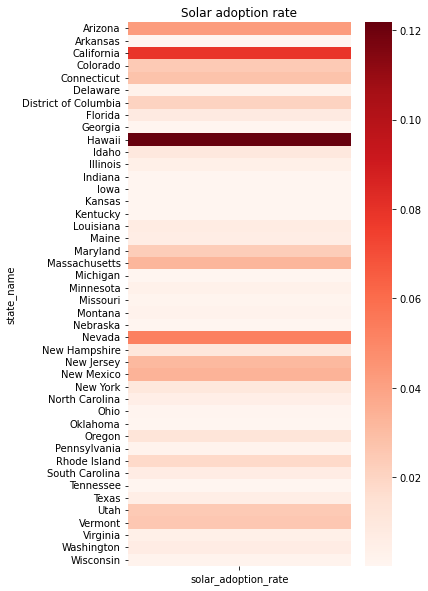

In [31]:
fig, ax = plt.subplots(figsize=(5, 10))
ax= sns.heatmap(result_new[[ 'solar_adoption_rate']], cmap="Reds")
ax.set_title("Solar adoption rate")

In [32]:
import plotly.express as px
fig = px.choropleth(result_new,
                    locations='state_postal', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='solar_adoption_rate',
                    color_continuous_scale="Viridis_r")
fig.update_layout(title_text = 'Solar adoption rate in 2020 by State',title_font_family="Times New Roman",title_font_size = 22,title_font_color="black", title_x=0.45,)
fig.show()

#### Correlation Matrix

In [33]:
result_new.columns
corr_df=result_new[['total_homes', 'owned',
       'rented', 'occupied', 'type_mobile_home', 'type_single_family_detached',
       'type_single_family_attached', 'type_apartment_building_2_to_4_units ',
       'type_apartment_building_more_5_units', 'year_made_before_1950',
       'year_made_1950_1959', 'year_made_1960_1969', 'year_made_1970_1979',
       'year_made_1980_1989', 'year_made_1990_1999', 'year_made_2000_2009',
       'year_made_2010_2015', 'year_made_2016_2020', 'use_solar_heating',
       'energy_assistance', 'total_count', 'Housing unit',
       'solar_adoption_rate']]

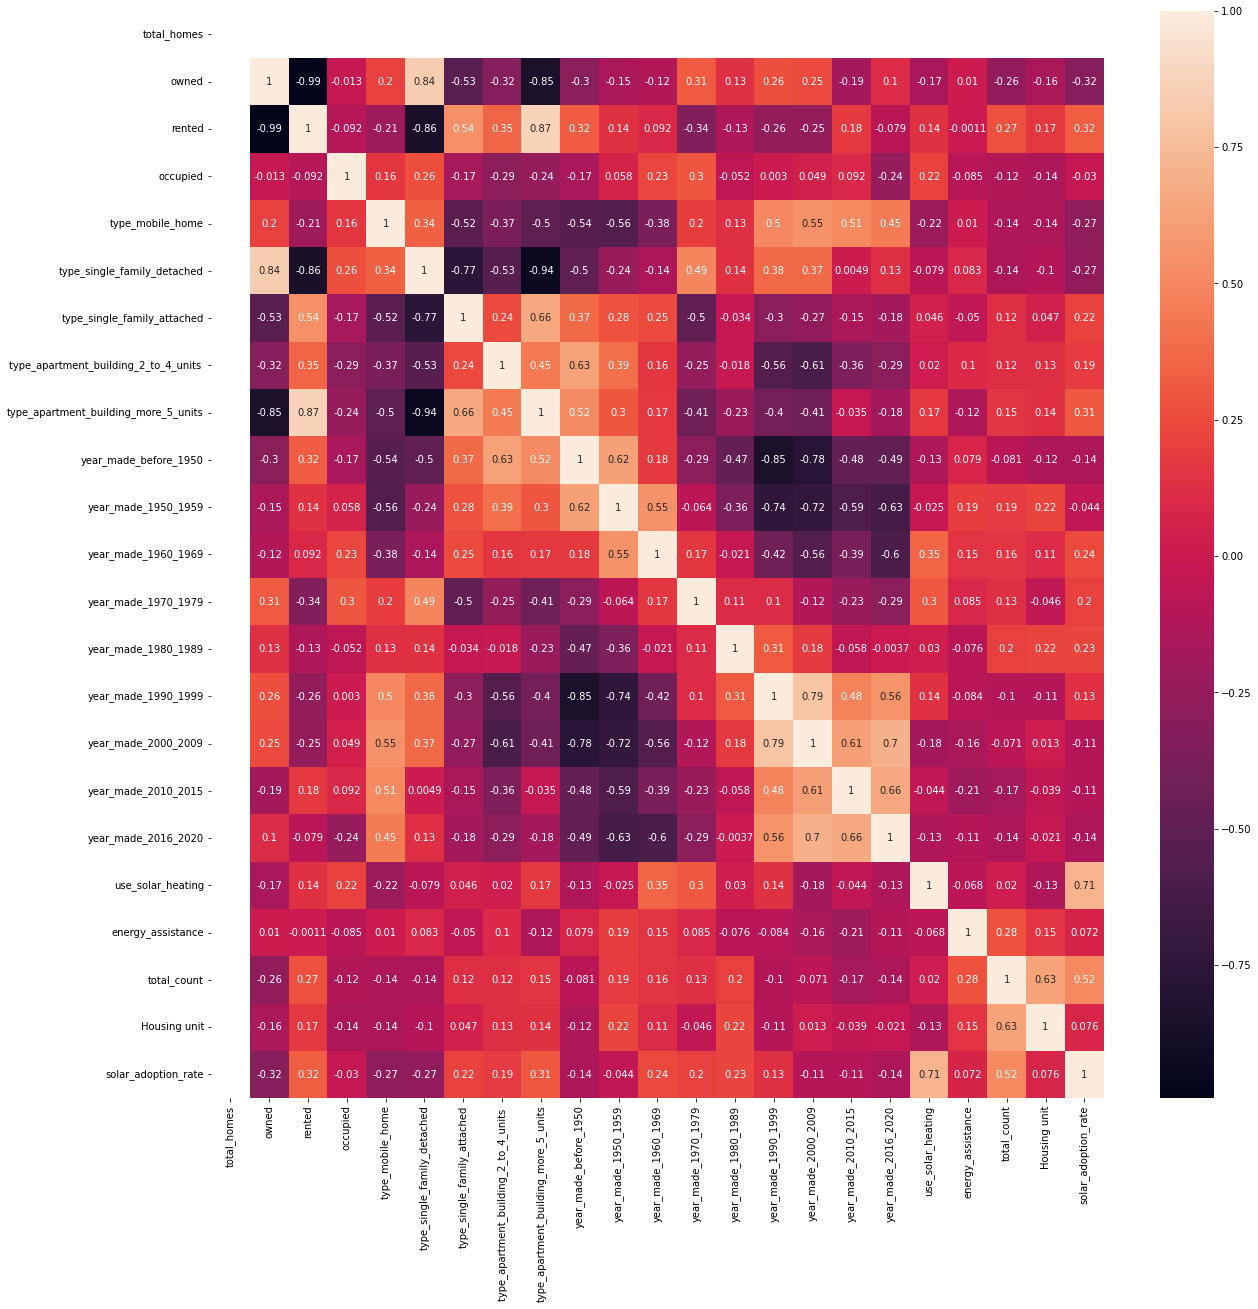

In [34]:
corr = corr_df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True)
plt.show()

#### Relationship between Solar adoption and House ownership

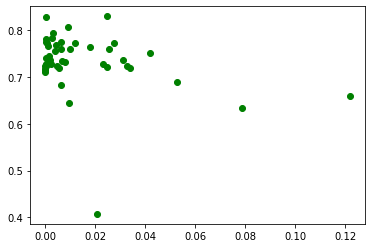

In [35]:
plt.scatter(result_new['solar_adoption_rate'], result_new['owned'],color='Green')
plt.show()

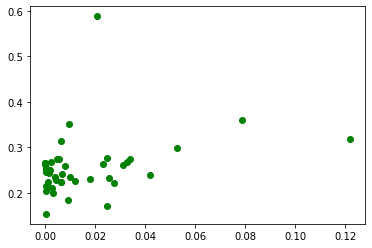

In [36]:
plt.scatter(result_new['solar_adoption_rate'], result_new['rented'],color='Green')
plt.show()

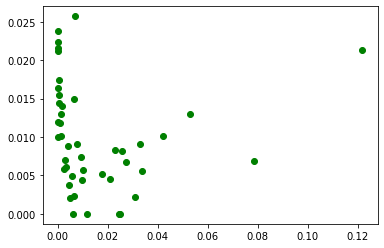

In [37]:
plt.scatter(result_new['solar_adoption_rate'], result_new['occupied'],color='Green')
plt.show()

#### Relationship between Solar adoption and Type of house

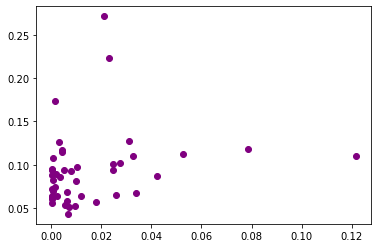

In [38]:
plt.scatter(result_new['solar_adoption_rate'], result_new['type_single_family_attached'],color='Purple')
plt.show()

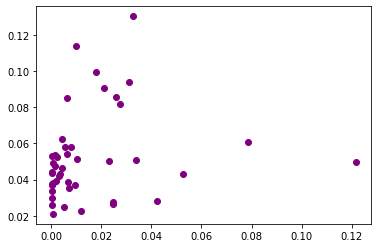

In [39]:
plt.scatter(result_new['solar_adoption_rate'], result_new['type_apartment_building_2_to_4_units '],color='Purple')
plt.show()

#### Relationship between Solar adoption and year of made

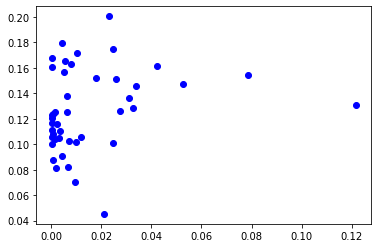

In [40]:
plt.scatter(result_new['solar_adoption_rate'], result_new['year_made_1980_1989'], color='Blue')
plt.show()

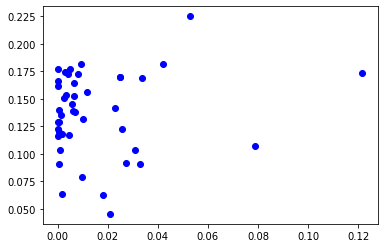

In [41]:
plt.scatter(result_new['solar_adoption_rate'], result_new['year_made_1990_1999'], color='Blue')
plt.show()